In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [337]:
path = r"C:\Users\buitr\Desktop\Data Analyst\Data Analytics Immersion\A6"

In [338]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'all_years_cleaned.csv'))

In [339]:
df.head()

,Country,Year,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Trust
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


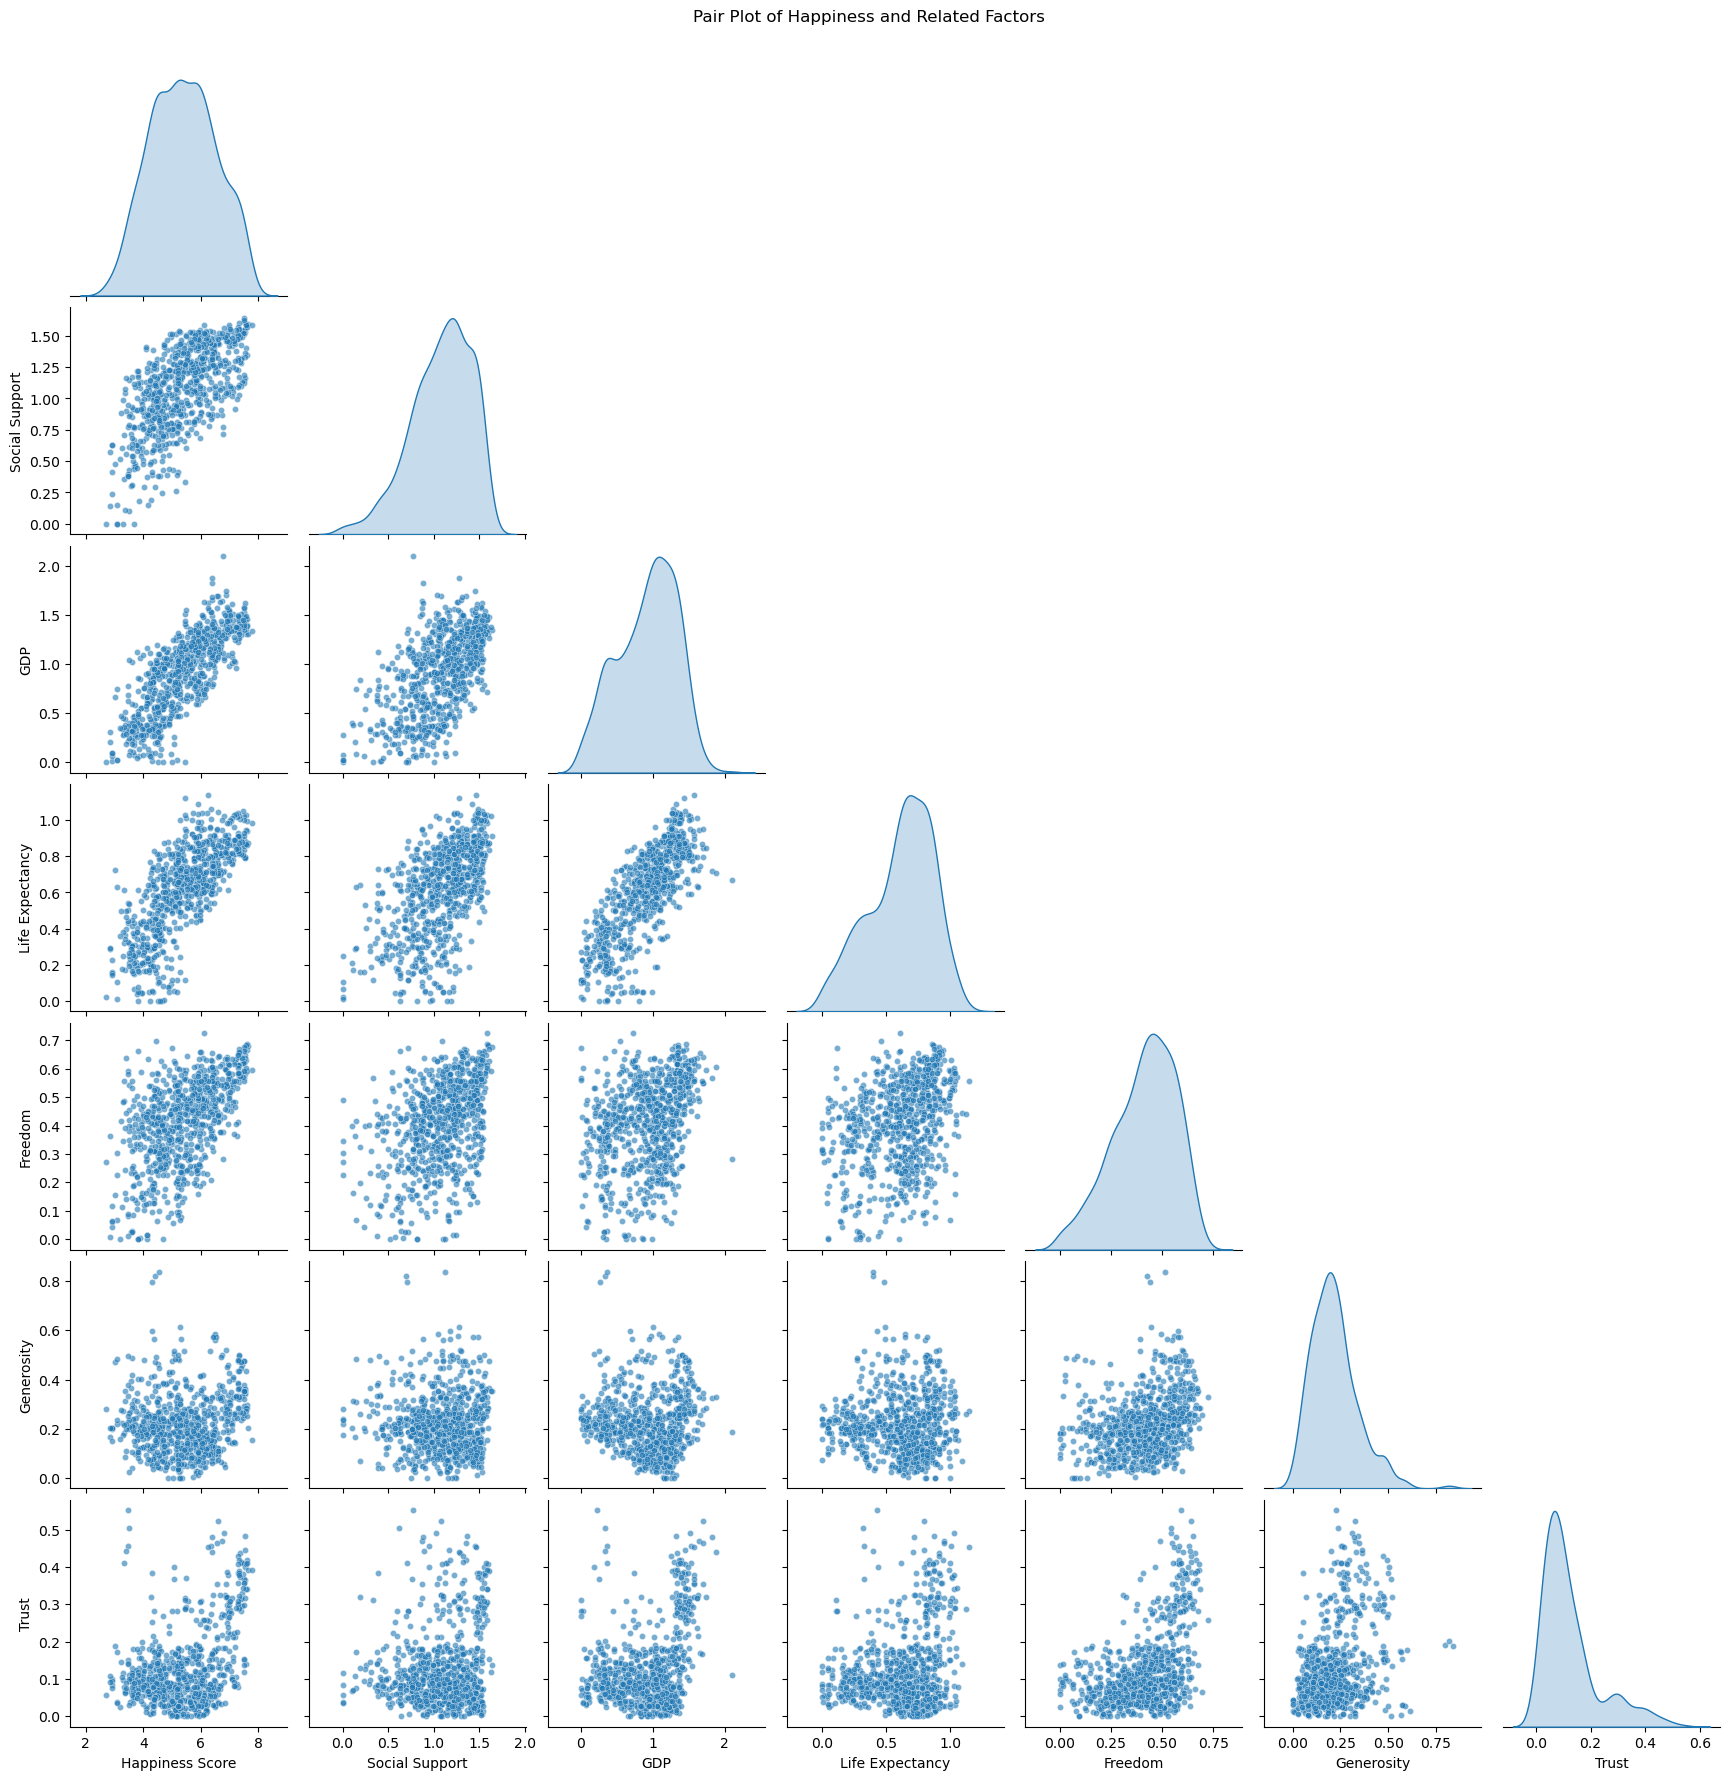

In [340]:
# Explore the data visually

cols = ['Happiness Score', 'Social Support', 'GDP', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust']

# Create pair plot
sns.pairplot(df[cols], corner=True, plot_kws={'alpha': 0.6, 's': 20}, diag_kind='kde')
plt.suptitle('Pair Plot of Happiness and Related Factors', y=1.02)
plt.show()

# Hypothesis
Higher levels of social support, GDP, life expectancy, and freedom are strongly associated with higher national happiness scores. Generosity and trust may also play a role, but the relationship is less clear and may not be linear.

In [342]:
# Define independent variable (X) and dependent variable (y)
X = df[['Social Support','GDP', 'Trust', 'Life Expectancy', 'Freedom', 'Generosity']]  # independent variable
y = df['Happiness Score']  # dependent variable

In [343]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [344]:
# Create a regression object
regression = LinearRegression()

In [345]:
# Training data
regression.fit(X_train, y_train)

LinearRegression()

In [346]:
# Evaluate the model
# Predict y, calculate RMSE and R2

y_train_pred = regression.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Predict on also test sets
y_test_pred = regression.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

In [347]:
print('Slope:', regression.coef_)

Slope: [0.56113739 1.09819917 1.03016555 1.10055792 1.46868087 0.35100914]


Slope: assuming all other variables are held constant:
- Freedom has the strongest positive influence on happiness (1.4687),
- followed by Life Expectancy and GDP,
- Trust and Generosity have meaningful positive contributions.

In [349]:
print("Mean squared error on Training Set:", rmse_train)
print("R² Score on Training Set:", r2_train)

# Check if it is overfit
print("Mean squared error on Test Set:", rmse_test)
print("R² Score on Test Set:", r2_test)

Mean squared error on Training Set: 0.5498073492730253
R² Score on Training Set: 0.7578888025508738
Mean squared error on Test Set: 0.5470636955300425
R² Score on Test Set: 0.7722690668835962


### Overfitting analysis

To check for overfitting, I compared the model’s performance on the training and test sets using R² and RMSE:

- R² Score on training set: 0.757
- R² Score on test set: 0.772
  
- RMSE on training set: 0.549
- RMSE on test set: 0.547

Since the values are similar, there is no sign of overfitting.  
The model performs consistently on both seen and unseen data.

In [351]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})

In [352]:
data.head(30)

,Actual,Predicted
382,5.525,5.678960
487,6.886,6.606505
351,6.344,6.348368
14,7.119,6.588032
145,3.781,4.261077
422,4.692,5.227619
753,4.390,4.271275
253,5.061,5.315880
175,6.929,6.469577
231,5.488,5.179340


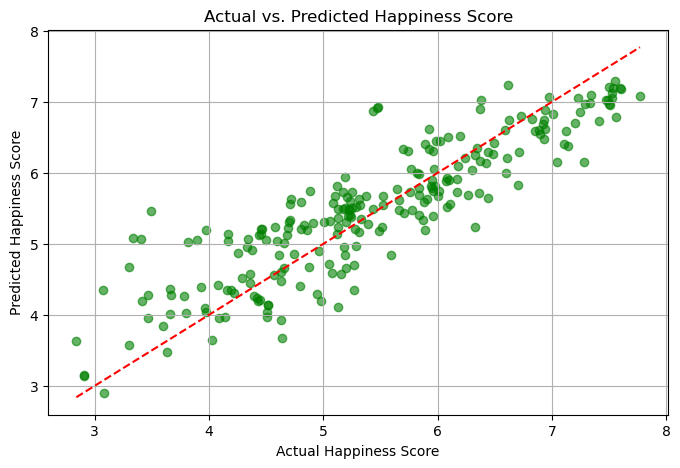

In [353]:
# shows the regression line on the test set.

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predicted, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score')
plt.grid(True)
plt.show()

This scatterplot shows how close the model's predictions were to the real happiness scores.
Each green dot is a country, and the red line shows where perfect predictions would land.

Most dots are close to the red line, which means the model did a decent job. There are a few points that are a bit off, but overall the trend is clear and consistent. So the model seems to work well for this kind of data.

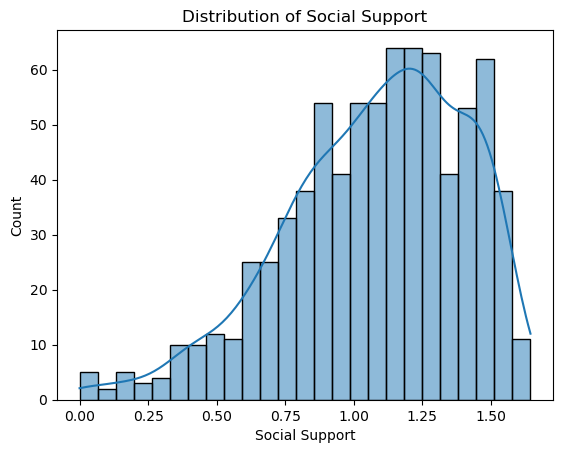

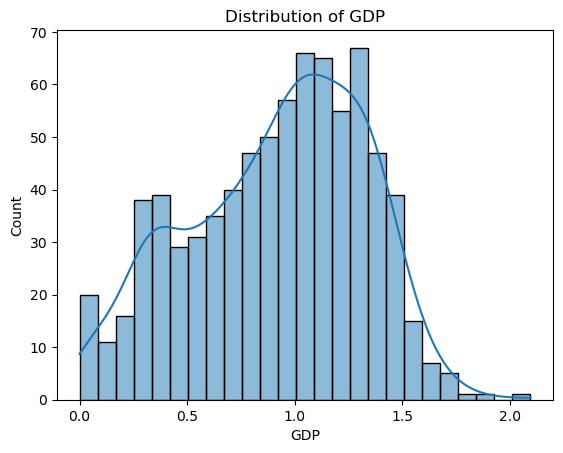

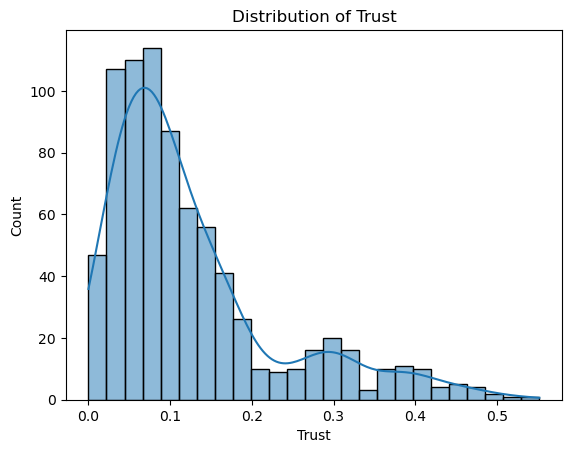

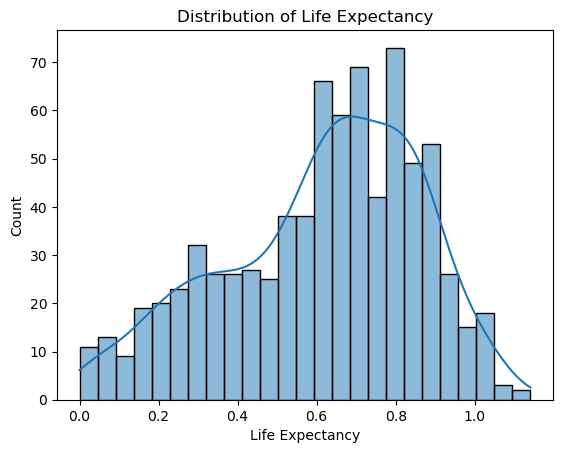

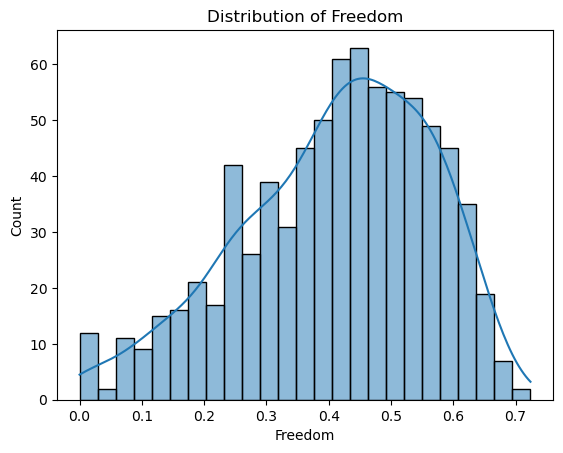

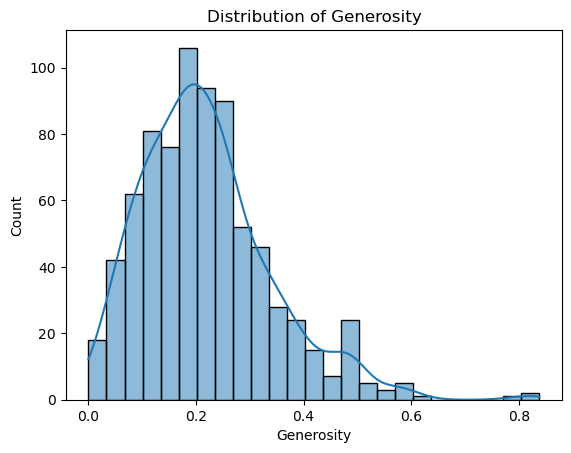

In [355]:
# Check Outliners

sns.histplot(df['Social Support'], bins=25, kde=True)
plt.title("Distribution of Social Support")
plt.show()

sns.histplot(df['GDP'], bins=25, kde=True)
plt.title("Distribution of GDP")
plt.show()

sns.histplot(df['Trust'], bins=25, kde=True)
plt.title("Distribution of Trust")
plt.show()

sns.histplot(df['Life Expectancy'], bins=25, kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()

sns.histplot(df['Freedom'], bins=25, kde=True)
plt.title("Distribution of Freedom")
plt.show()

sns.histplot(df['Generosity'], bins=25, kde=True)
plt.title("Distribution of Generosity")
plt.show()

The distributions of all variables (e.g. Life Expectancy, Generosity, GDP) showed some skewness but no extreme or implausible outliers. All values appear to reflect real-world differences between countries. No data points were removed.

### Conclusion
The R² scores indicate that about 77% of the variance in Happiness Score is explained by the model on the test set, which is a strong result.
All variables have positive coefficients, supporting the hypothesis that higher values in these domains are associated with greater happiness.
The strongest predictors appear to be Freedom and Life Expectancy, based on their coefficients.
The model performs similarly on training and test data, meaning it generalizes well and shows no signs of overfitting.

The analysis supports the hypothesis.
Countries with higher levels of social support, economic well-being, freedom, health, generosity, and trust tend to report higher happiness scores.